In [57]:
import requests 
from dotenv import load_dotenv
import os
import json 
import pandas as pd
from math import e
import pandas as pd
import numpy as np
import yfinance as yf
import PySimpleGUI as sg
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import opstrat as op
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader as pdr
%matplotlib inline

In [3]:
load_dotenv()
#td_consumer_key=os.getenv('td_consumer_key')
td_consumer_key = 'VMAGNPYFOLERVU35ZOSP022T2RCZFBFQ'

In [4]:
ticker=['GOOG']
contractType=['CALL','PUT','ALL']
stdate='2021-09-24'
edate='2021-12-24'

In [5]:
url=f'https://api.tdameritrade.com/v1/marketdata/chains?&symbol={ticker[0]}&contractType={contractType[2]}&fromDate={stdate}&toDate={edate}'

In [6]:
response=requests.get(url, params={'apikey':td_consumer_key})
data=response.json()

In [7]:
meta={k:v for k, v in data.items() if k in ["symbol","status","underlying","strategy","interval", "isDelayed", "isIndex","interestRate",  "underlyingPrice", "volatility","daysToExpiration","numberOfContracts"]}
meta

{'symbol': 'GOOG',
 'status': 'SUCCESS',
 'underlying': None,
 'strategy': 'SINGLE',
 'interval': 0.0,
 'isDelayed': True,
 'isIndex': False,
 'interestRate': 0.1,
 'underlyingPrice': 2814.625,
 'volatility': 29.0,
 'daysToExpiration': 0.0,
 'numberOfContracts': 2722}

In [8]:
call=data['callExpDateMap']
dfc=pd.DataFrame.from_dict(call, orient='index').stack().to_frame()
dfc=pd.DataFrame(dfc[0].values.tolist(), index=dfc.index)
dfc=pd.DataFrame(dfc[0].values.tolist(), index=dfc.index)
dfc.head()

putCall            symbol  \
2021-09-24:2 1670.0    CALL  GOOG_092421C1670   
             1680.0    CALL  GOOG_092421C1680   
             1690.0    CALL  GOOG_092421C1690   
             1700.0    CALL  GOOG_092421C1700   
             1710.0    CALL  GOOG_092421C1710   

                                             description exchangeName     bid  \
2021-09-24:2 1670.0  GOOG Sep 24 2021 1670 Call (Weekly)          OPR  1143.5   
             1680.0  GOOG Sep 24 2021 1680 Call (Weekly)          OPR  1133.5   
             1690.0  GOOG Sep 24 2021 1690 Call (Weekly)          OPR  1123.5   
             1700.0  GOOG Sep 24 2021 1700 Call (Weekly)          OPR  1113.5   
             1710.0  GOOG Sep 24 2021 1710 Call (Weekly)          OPR  1103.5   

                        ask    last     mark  bidSize  askSize  ...  \
2021-09-24:2 1670.0  1146.0  1122.3  1144.75        1        3  ...   
             1680.0  1136.0     0.0  1134.75        1        3  ...   
             1690.0  1126.0  1060.9  1124.75        1        3  ...   
             1700.0  1117.0  1180.8  1115.25        7       10  ...   
             1710.0  1106.1     0.0  1104.80        4        2  ...   

                    deliverableNote  isIndexOption  percentChange  markChange  \
2021-09-24:2 1670.0                           None          -0.07       21.69   
             1680.0                           None           0.00       21.69   
             1690.0                           None          -3.82       21.69   
             1700.0                           None           8.03       22.19   
             1710.0                           None           0.00       21.74   

                     markPercentChange  intrinsicValue  inTheMoney pennyPilot  \
2021-09-24:2 1670.0               1.93         1144.28        True      False   
             1680.0               1.95         1134.28        True      False   
             1690.0               1.97         1124.28        True      False   
             1700.0               2.03         1114.28        True      False   
             1710.0               2.01         1104.28        True      False   

                     nonStandard   mini  
2021-09-24:2 1670.0        False  False  
             1680.0        False  False  
             1690.0        False  False  
             1700.0        False  False  
             1710.0        False  False  

[5 rows x 49 columns]

In [9]:
dfc=dfc.reset_index()
dfc.head(3)

,level_0,level_1,putCall,symbol,description,exchangeName,bid,ask,last,mark,...,deliverableNote,isIndexOption,percentChange,markChange,markPercentChange,intrinsicValue,inTheMoney,pennyPilot,nonStandard,mini
0,2021-09-24:2,1670.0,CALL,GOOG_092421C1670,GOOG Sep 24 2021 1670 Call (Weekly),OPR,1143.5,1146.0,1122.3,1144.75,...,,None,-0.07,21.69,1.93,1144.28,True,False,False,False
1,2021-09-24:2,1680.0,CALL,GOOG_092421C1680,GOOG Sep 24 2021 1680 Call (Weekly),OPR,1133.5,1136.0,0.0,1134.75,...,,None,0.00,21.69,1.95,1134.28,True,False,False,False
2,2021-09-24:2,1690.0,CALL,GOOG_092421C1690,GOOG Sep 24 2021 1690 Call (Weekly),OPR,1123.5,1126.0,1060.9,1124.75,...,,None,-3.82,21.69,1.97,1124.28,True,False,False,False


In [10]:
set(dfc.level_0)


{'2021-09-24:2',
 '2021-10-01:9',
 '2021-10-08:16',
 '2021-10-15:23',
 '2021-10-22:30',
 '2021-10-29:37',
 '2021-11-19:58',
 '2021-12-17:86'}

In [11]:
put=data['putExpDateMap']
dfp=pd.DataFrame.from_dict(put, orient='index').stack().to_frame()
dfp=pd.DataFrame(dfp[0].values.tolist(), index=dfp.index)
dfp=pd.DataFrame(dfp[0].values.tolist(), index=dfp.index)
dfp.reset_index(inplace=True)
dfp.head()

,level_0,level_1,putCall,symbol,description,exchangeName,bid,ask,last,mark,...,deliverableNote,isIndexOption,percentChange,markChange,markPercentChange,intrinsicValue,inTheMoney,pennyPilot,nonStandard,mini
0,2021-09-24:2,1670.0,PUT,GOOG_092421P1670,GOOG Sep 24 2021 1670 Put (Weekly),OPR,0.0,0.25,0.05,0.13,...,,None,49900.00,0.12,124900.0,-1144.28,False,False,False,False
1,2021-09-24:2,1680.0,PUT,GOOG_092421P1680,GOOG Sep 24 2021 1680 Put (Weekly),OPR,0.0,0.25,0.05,0.13,...,,None,49900.00,0.12,124900.0,-1134.28,False,False,False,False
2,2021-09-24:2,1690.0,PUT,GOOG_092421P1690,GOOG Sep 24 2021 1690 Put (Weekly),OPR,0.0,0.25,0.10,0.13,...,,None,99900.00,0.12,124900.0,-1124.28,False,False,False,False
3,2021-09-24:2,1700.0,PUT,GOOG_092421P1700,GOOG Sep 24 2021 1700 Put (Weekly),OPR,0.0,0.25,0.15,0.13,...,,None,149900.01,0.12,124900.0,-1114.28,False,False,False,False
4,2021-09-24:2,1710.0,PUT,GOOG_092421P1710,GOOG Sep 24 2021 1710 Put (Weekly),OPR,0.0,0.25,0.10,0.13,...,,None,99900.00,0.12,124900.0,-1104.28,False,False,False,False


In [12]:
dfc.shape

(1361, 51)

In [13]:
dfp.shape

(1361, 51)

In [14]:
df_all=pd.concat([dfc, dfp])
df_all.shape

(2722, 51)

In [15]:
df_all.to_csv("GOOG.csv")

In [16]:
df_all['strike_price']=df_all['level_1']
df_all['strike_price']=df_all['strike_price'].astype('float64')

In [17]:
df_all['volatility']=df_all['volatility'].astype('float64')
df_all['delta']=df_all['delta'].astype('float64')
df_all['gamma']=df_all['gamma'].astype('float64')
df_all['theta']=df_all['theta'].astype('float64')

In [18]:
# Create 3 new dataframes: 
#      ‘inTheMoney’ = False & ‘daysToExpiration’ between 15 & 30. (=df1)
#.     ‘inTheMoney’ = False & ‘daysToExpiration’ between 31 & 60. (=df2)
#      ‘inTheMoney’ = False & ‘daysToExpiration’ between 61 & 90. (=df3)
df1=df_all.loc[(df_all.inTheMoney==False) & (df_all.daysToExpiration>=15) & (df_all.daysToExpiration<=30)]
df2=df_all.loc[(df_all.inTheMoney==False) & (df_all.daysToExpiration>=31) & (df_all.daysToExpiration<=60)]
df3=df_all.loc[(df_all.inTheMoney==False) & (df_all.daysToExpiration>=61) & (df_all.daysToExpiration<=90)]

In [19]:
TICKER=yf.download('GOOG')
TICKER

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
...,...,...,...,...,...,...
2021-09-16,2902.419922,2904.000000,2868.326904,2887.469971,2887.469971,1014600
2021-09-17,2875.969971,2884.989990,2821.229980,2829.270020,2829.270020,2929500
2021-09-20,2780.003906,2787.250000,2741.060059,2780.340088,2780.340088,1745900


In [20]:
df_ticker1=TICKER.iloc[-90:]
df_ticker1=df_ticker1[['Adj Close']]
df_ticker1

,Adj Close
Date,
2021-05-17,2321.409912
2021-05-18,2303.429932
2021-05-19,2308.709961
2021-05-20,2356.090088
2021-05-21,2345.100098
...,...
2021-09-16,2887.469971
2021-09-17,2829.270020
2021-09-20,2780.340088


In [21]:
df_ticker1.to_csv("GOOG_adjPrice.csv")

In [22]:
# Check for underlying price (closing Price) for last 6 days = [ p0, p1,p2,p3,p4, p5)
df_ticker=TICKER.iloc[-6:]
df_ticker=df_ticker[['Adj Close']]
df_ticker

,Adj Close
Date,
2021-09-15,2904.120117
2021-09-16,2887.469971
2021-09-17,2829.270020
2021-09-20,2780.340088
2021-09-21,2792.929932
2021-09-22,2814.969971


In [23]:
# Calculate the daily changes in price of Underlying P = Change in P = todays price - yesterday’s price =Pn - P(n-1)
df_ticker2=df_ticker.diff()
df_ticker2.dropna(inplace=True)

In [24]:
df_ticker2

,Adj Close
Date,
2021-09-16,-16.650146
2021-09-17,-58.199951
2021-09-20,-48.929932
2021-09-21,12.589844
2021-09-22,22.040039


In [25]:
#import numpy as np
# Square the daily changes in the price as per step 1
# Calculate 5 days average of the squared daily changes in Price as per step 2 for 5 trailing days = S
df_ticker2['new']=df_ticker2['Adj Close']**2/len(df_ticker2)
df_ticker2


# Calculate the square root of average, S as per step 3 = DVIV
DVIV=np.sqrt(df_ticker2['new'].sum())

In [26]:
# Vt = std deviation for option time window (90 Days)
vt=175

In [27]:
!pip install pysimplegui

In [28]:
# import PySimpleGUI as sg

In [29]:
# userInput=pd.DataFrame()

In [30]:
### layout = [
###

In [31]:
#userInput
#userInput ='Long Term'

In [32]:
#if user_input =='Long Term':
#    df_sub=df3
#elif user_input =='Mid Term':
#    df_sub=df2
#elif user_input =='Short-Term':
#    df_sub=df1
#else:
#    df_sub=df_all

In [33]:
df_sub=df_all

In [34]:
HPD= 3
ECIV = DVIV * np.sqrt((HPD)* 5/7)
# Vega Effect, VE =  -ABS(Ve) * ECIV
df_sub['vega_effect']=df_sub['vega'].abs()*(-1)*ECIV
# Theta Effect, TE = Th * HPD
df_sub['Theta Effect']= df_sub['theta'] * HPD
most_recent_price=df_ticker.iloc[-1]
IV=df_sub['volatility']
# Expected Price Change, EPC = P * (Exp (IV*((HPD/365) ^ 0.5))-1)
#EPC = P * (e**(IV*((HPD/365)**0.5)) - 1)
df_sub['Expected_price_change']= most_recent_price.values[0]*(e**(IV.values*(HPD/365)**0.5)-1)
# Delta Effect (DE) = -ABS(Delta)* EPC
df_sub['Delta_Effect']=abs(-df_sub['delta'])*(-1)*df_sub['Expected_price_change']
# Gamma Effect (GE) = Gamma * (EPC^2)/2
df_sub['gamma_effect']=df_sub['gamma']*(df_sub['Expected_price_change']**2)/2
# VTRRR = (VE/TE)
VTRRR=df_sub['vega_effect']/df_sub['Theta Effect']
# DTRRR = (DE +GE)/TE
DTRRR=(df_sub['Delta_Effect']+df_sub['gamma_effect'])/df_sub['Theta Effect']
# Rt = DTRRR +VTRRR  risk return ratio
# Add a column Risk Return Ratio
df_sub['Risk_Return']=DTRRR +VTRRR

In [35]:
#For ‘putCall’ = CALL & ` strike price in the range, (‘p0 + 0.75 * Vt’  to p0 + 1.25 *Vt),
#Rt = Rt min & Symbol_CS = corresponding symbol. Dcs = Delta, Pcs = Strike Price


call_short=df_sub.loc[(df_sub.putCall=='CALL')& 
           (df_sub.strike_price.values >=most_recent_price[0]+1*vt)& 
           (df_sub.strike_price.values <=most_recent_price[0]+1.5*vt)&
           (df_sub.daysToExpiration >= 15) &
                     (df_sub.daysToExpiration <= 75)]
call_short=call_short.loc[call_short['Risk_Return']==call_short['Risk_Return'].min()][['symbol','delta','strike_price','Risk_Return','ask','bid', 'daysToExpiration']]


#For ‘putCall’ = CALL & ` strike price in the range, (‘Pcs + 15’ to 'Pcs + 50'),
#Rt = Rt min & Symbol_CL= corresponding symbol. Dcl = Delta, Pcl = Strike Price

pcs=call_short['strike_price']

call_long=df_sub.loc[(df_sub.putCall=='CALL')& 
           (df_sub.strike_price.values >=pcs.values[0]+100)& 
           (df_sub.strike_price.values <=pcs.values[0]+250)&
           (df_sub.daysToExpiration == call_short.daysToExpiration.values[0])
                    ]
call_long= call_long.loc[call_long['Risk_Return']==call_long['Risk_Return'].min()][['symbol','delta','strike_price','Risk_Return','ask','bid','daysToExpiration']]

In [36]:
call_long

,symbol,delta,strike_price,Risk_Return,ask,bid,daysToExpiration
1351,GOOG_100821C3150,0.015,3150.0,682.23,1.0,0.55,16


In [37]:
call_short

,symbol,delta,strike_price,Risk_Return,ask,bid,daysToExpiration
1349,GOOG_100821C3050,0.042,3050.0,-134327.761985,2.35,1.95,16


In [38]:
# For ‘putCall’ = PUT & ` strike price < (‘p0 – (Pcs-P0)* 1.25)
# Delta_diff = [Abs(Delta – Dcs)]
# Check for min Delta_diff
# Dps = corresponding Delta, Symbol_PS = corresponding symbol Pps = Strike Price
put_short= df_sub.loc[(df_sub.putCall=='PUT') & 
           (df_sub.strike_price.values < (most_recent_price[0]-(pcs.iloc[0]-most_recent_price.iloc[0])*0.5))&
           (df_sub.strike_price.values > (most_recent_price[0]-(pcs.iloc[0]-most_recent_price.iloc[0])*1.25))&
                      (df_sub.daysToExpiration == call_short.daysToExpiration.values[0])
                    ]
put_short['delta_diff']= abs(put_short['delta']-call_short.delta.iloc[0])
put_short= put_short.loc[put_short['Risk_Return']==put_short['Risk_Return'].min()][['symbol','delta','strike_price','Risk_Return','ask','bid','daysToExpiration']]
put_short=put_short.loc[put_short.strike_price==put_short.strike_price.max()]

In [39]:
put_short

,symbol,delta,strike_price,Risk_Return,ask,bid,daysToExpiration
1265,GOOG_100821P2530,-0.084,2530.0,-1.038934e+06,9.2,8.7,16


In [40]:
# For ‘putCall’ = PUT & ` strike price <  (‘Pps – (Pcl-Pcs)*1.25)
# Delta_diff = [Abs(Delta – Dcl)]
# Check for min Delta_diff 
# Dpl = corresponding Delta, Symbol_PL = corresponding symbol

pps=put_short['strike_price']
put_long=df_sub.loc[(df_sub.putCall=='PUT')& 
                    (df_sub.strike_price.values <= (pps.iloc[0]-(call_long.strike_price.iloc[0]-call_short.strike_price.iloc[0])*1.25)) &
                    (df_sub.strike_price.values >= (pps.iloc[0]-(call_long.strike_price.iloc[0]-call_short.strike_price.iloc[0])*1.75)) &
                    (df_sub.daysToExpiration == call_short.daysToExpiration.values[0])
                    ]

put_long['delta_diff']= abs(put_long['delta']-call_long.iloc[0,1])
put_long= put_long.loc[put_long['Risk_Return']==put_long['Risk_Return'].min()][['symbol','delta','strike_price','Risk_Return','ask','bid','daysToExpiration']]
put_long=put_long.loc[put_long.strike_price==put_long.strike_price.max()]

In [41]:
put_long

,symbol,delta,strike_price,Risk_Return,ask,bid,daysToExpiration
1252,GOOG_100821P2400,-0.042,2400.0,3045.896285,4.9,4.4,16


In [42]:
# Max Income, I = Price of CS + Price of PS – Price of CL -Price of PL
# Maximum Loss, Pot_Loss = Max[( Pps- Ppl), (Pcl-Pcs)]-I
# Break Even Lower be_lower= Pps- I
# Break Even Upper, be_upper= Pcs + I
max_income=(call_short.ask.values[0]+ put_short.ask.values[0]-call_long.ask.values[0]-put_long.ask.values[0])*100
max_loss= max((put_short.strike_price.values[0]-put_long.strike_price.values[0]),
              (call_long.strike_price.values[0]-call_short.strike_price.values[0]))*100-max_income
break_even_lower= put_short.strike_price.values[0]-max_income/100
break_even_upper= call_short.strike_price.values[0]+max_income/100

In [43]:
# Recommendations:
# Call Short: Symbol_CS
# Call Long: Symbol_CL
# Put Short: Symbol_PS
# Put Long: Symbol_PL
# Maximum Possible Profit = I
# Maximum Potential Loss = Pot_Loss
# Profitable Price Range = ( be_lower, be_upper)
print(f'Call Short:     {call_short.symbol.values}')
print(f'Call Long:      {call_long.symbol.values}')
print(f'Put Short:      {put_short.symbol.values}')
print(f'Put Long:       {put_long.symbol.values}')

print(f'Maximum Possible Profit:      {max_income}')
print(f'Maximum Potential loss:      {max_loss}')

print(f'Break Even Lower be_lower:      {break_even_lower}')
print(f'Break Even Upper:               {break_even_upper}')

Call Short:     ['GOOG_100821C3050']
Call Long:      ['GOOG_100821C3150']
Put Short:      ['GOOG_100821P2530']
Put Long:       ['GOOG_100821P2400']
Maximum Possible Profit:      564.9999999999999
Maximum Potential loss:      12435.0
Break Even Lower be_lower:      2524.35
Break Even Upper:               3055.65


In [44]:
#Visualizations

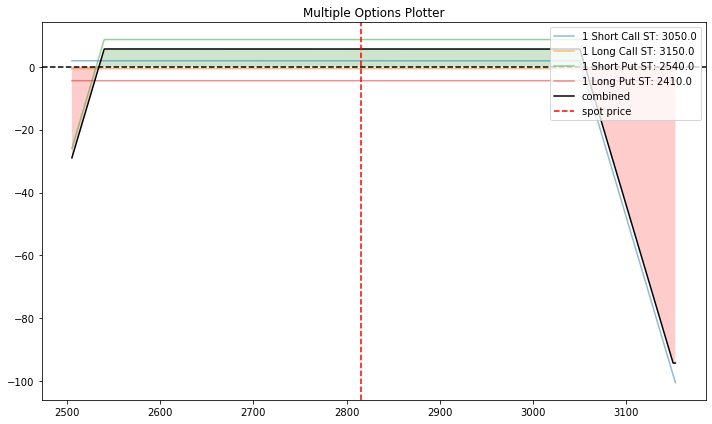

In [144]:
op1={'op_type': 'c', 'strike': 3050.0, 'tr_type': 's', 'op_pr': 1.95}
op2={'op_type': 'c', 'strike': 3150.0, 'tr_type': 'b', 'op_pr': 0.55}
op3={'op_type': 'p', 'strike': 2540.0, 'tr_type': 's', 'op_pr': 8.7}
op4={'op_type': 'p', 'strike': 2410.0, 'tr_type': 'b', 'op_pr': 4.4}

op_list=[op1, op2, op3, op4]
op.multi_plotter(spot=2814.969971,spot_range=, op_list=op_list)

# fig = px.line(df, x = 'AAPL_x', y = 'AAPL_y', title='Apple Share Prices over time (2014)')
fig.show()

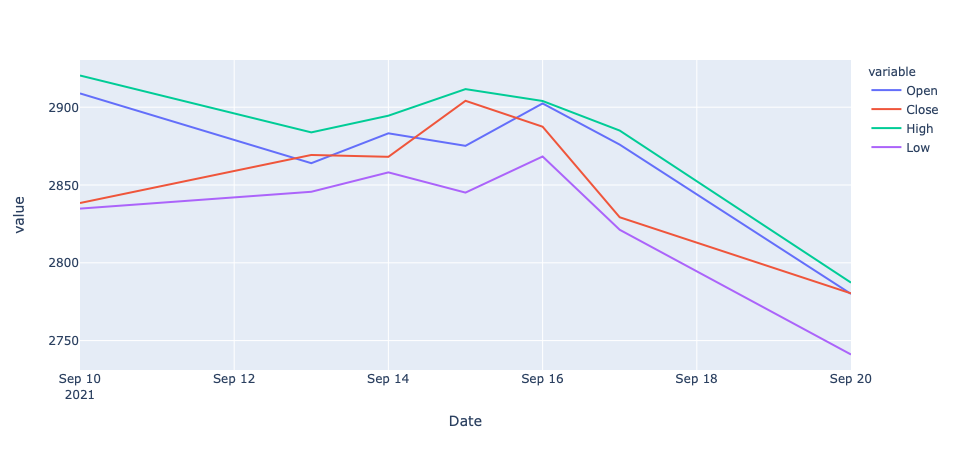

In [67]:
Google_Stocks_DF = Google_Stocks.reset_index()
px.line(Google_Stocks_DF, x='Date', y=['Open', 'Close', 'High', 'Low'], labels={'x': 'date', 'y':'Price'})

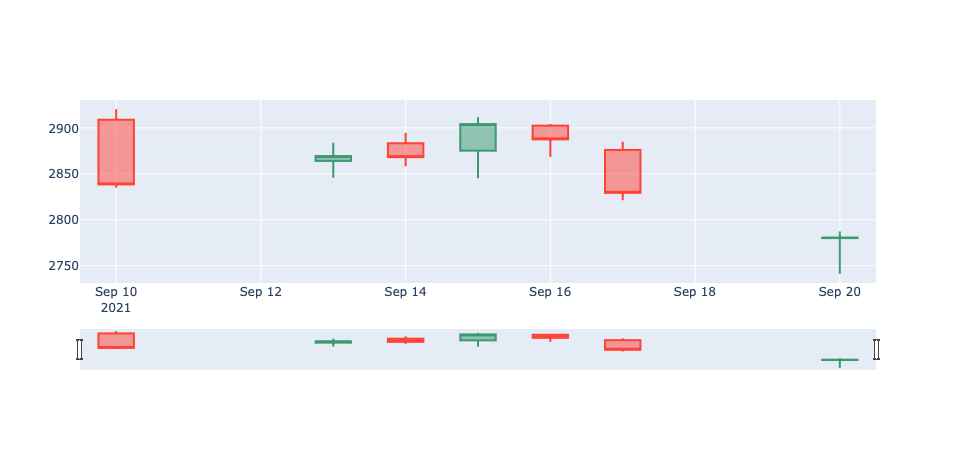

In [68]:
from datetime import datetime
fig = go.Figure(
    data=[
        go.Candlestick(x=Google_Stocks_DF['Date'],
                open=Google_Stocks_DF['Open'],
                high=Google_Stocks_DF['High'],
                low=Google_Stocks_DF['Low'],
                close=Google_Stocks_DF['Close'])
    ]
)
fig.show()

In [58]:
ticker = "GOOG"
start = dt.datetime(2021, 7, 12)
end = dt.datetime(2021, 8, 21)

data = pdr.get_data_yahoo(ticker, start, end)

print(data.head())

                   High          Low         Open        Close  Volume  \
Date                                                                     
2021-07-12  2615.399902  2592.000000  2596.669922  2611.280029  847200   
2021-07-13  2640.840088  2612.739990  2617.629883  2619.889893  830900   
2021-07-14  2659.919922  2637.959961  2638.030029  2641.649902  895600   
2021-07-15  2651.899902  2611.959961  2650.000000  2625.330078  829300   
2021-07-16  2643.659912  2616.429932  2632.820068  2636.909912  742800   

              Adj Close  
Date                     
2021-07-12  2611.280029  
2021-07-13  2619.889893  
2021-07-14  2641.649902  
2021-07-15  2625.330078  
2021-07-16  2636.909912  


In [59]:
data['Log returns'] = np.log(data['Close']/data['Close'].shift())

In [60]:
data['Log returns'].std()

0.010436176414794525

In [61]:
volatility = data['Log returns'].std()*252**.5

Text(0.5, 1.0, 'GOOG volatility: 16.57%')

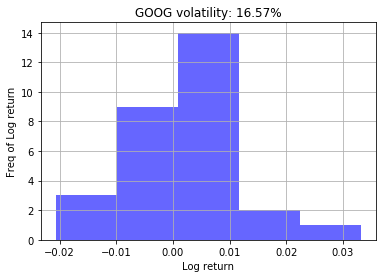

In [62]:
str_vol = str(round(volatility, 4)*100)

fig, ax = plt.subplots()
data['Log returns'].hist(ax=ax, bins=5, alpha=0.6, color='b')
ax.set_xlabel('Log return')
ax.set_ylabel('Freq of Log return')
ax.set_title('GOOG volatility: ' + str_vol + "%")